In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM


In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

Base = automap_base()


In [6]:
# reflect the tables
Base.prepare(autoload_with = engine)
Base.classes.keys()

['measurement', 'station']

In [7]:
# save references to each table
MeasureReference = Base.classes.measurement
StationReference = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

## Exploratory Precipitation Analysis

In [9]:
MeasureReference

sqlalchemy.ext.automap.measurement

In [10]:
for x in inspector.get_columns('measurement'):
    print(x["name"])

id
station
date
prcp
tobs


In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

recent = session.query(func.max(MeasureReference.date)).first()
recent

('2017-08-23',)

In [12]:
# Calculate the date one year from the last date in data set.

last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
last_year

datetime.date(2016, 8, 23)

In [13]:
#perform a query to retrieve the data and precipitation scores

results = session.query(MeasureReference.date, MeasureReference.prcp).filter(MeasureReference.date >= last_year).all()
results

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [14]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names

rainDF = pd.DataFrame(results, columns = ["date", "precipitation"])
rainDF

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [15]:
# Sort the dataframe by date
sortedRain = rainDF.sort_values(by = "date")

sortedRain

#going to use session.query( alot  )


#func.count, func.min, .avg, .max when it comes to lowest highest yadayaday temperateure



#make dataframes for information

,date,precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


In [16]:
# Use Pandas Plotting with Matplotlib to plot the data

sortedRain.set_index("date", inplace = True)

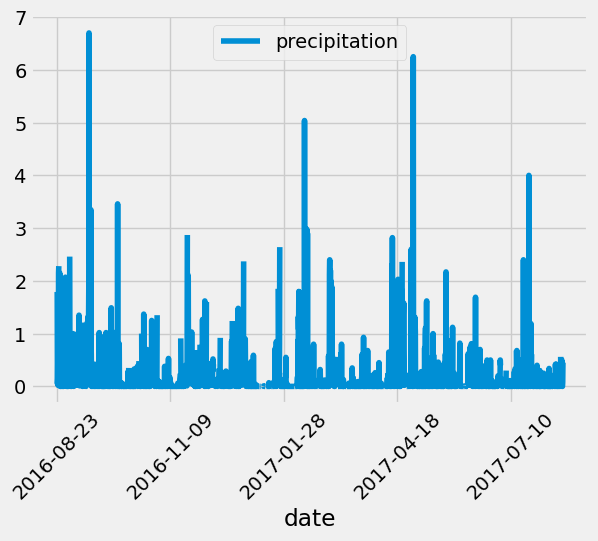

In [17]:
sortedRain.plot()
plt.xticks(rotation = 45)
plt.show()

In [18]:
# Use Pandas to calculate the summary statistics for the precipitation data

allRain = sortedRain.describe(include = "all")
allRain

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Exploratory Station Analysis

In [19]:
StationReference

sqlalchemy.ext.automap.station

In [20]:
for x in inspector.get_columns('station'):
    print(x["name"])

id
station
name
latitude
longitude
elevation


In [21]:
# Design a query to calculate the total number of stations in the dataset

stationNum = session.query(func.count(StationReference.station)).all()
stationNum

[(9,)]

In [22]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

allStation = session.query(MeasureReference.station, func.count(MeasureReference.station)).\
group_by(MeasureReference.station).order_by(func.count(MeasureReference.station).desc()).all()



print(f"Station USC00519281 has the highest number of observations.")
allStation

Station USC00519281 has the highest number of observations.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(MeasureReference.station, func.min(MeasureReference.tobs), func.max(MeasureReference.tobs),\
func.avg(MeasureReference.tobs)).filter(MeasureReference.station == "USC00519281").all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

<AxesSubplot:ylabel='Frequency'>

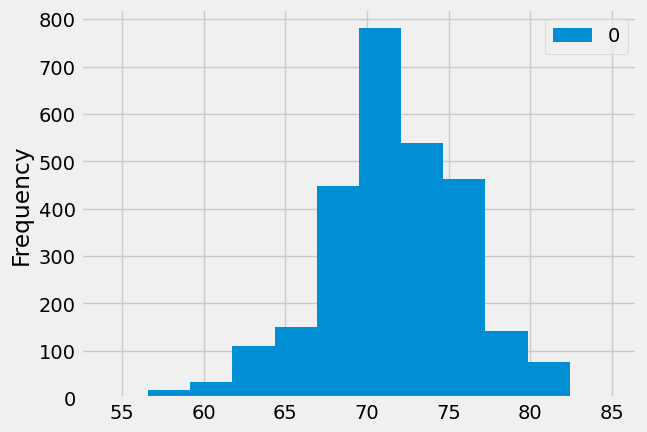

In [24]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

results = session.query(MeasureReference.tobs).filter().\
filter(MeasureReference.station == "USC00519281").all()

dfSession = pd.DataFrame(results)

dfSession.plot(kind="hist", bins=12)